# ANÁLISIS EXPLORATORIO DE OUTLIERS

In [1]:
# Importación de bibliotecas necesarias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Lectura de dataframe
df = pd.read_csv('../data_edit/dataframe_edit_clean.csv',sep=',', encoding='latin-1', index_col=0, low_memory=False, parse_dates=['FECHA'])

## CALIBRACIONES DE LOS EQUIPOS

- `CAUDAL`: Los valores reales oscilan entre 400 a 760 litros/segundo, pueden haber valores de 200 por algún taponamiento en la bocatoma, aunque el equipo puede medir hasta un límite superior de 1348 litros/segundo.
- `AGUA_CRUDA_P.H`: Los valores generalmente medidos se encuentran en el rango de 6 a 9.5. Sin embargo, el equipo está calibrado para un rango más amplio, de 4 a 10.
- `AGUA_CRUDA_COLOR`: El equipo proporciona mediciones confiables hasta un máximo de 500 UPC. Si se superan estos valores, se registran manualmente por el operador a través de métodos de dilución.
- `AGUA_CRUDA_NTU`: El equipo proporciona mediciones confiables hasta un máximo de 800 NTU. Si se superan estos valores, se registran manualmente por el operador a través de métodos de dilución.
- `AGUA_CRUDA_ALCALINIDAD`: Máximo 100 PPM de carbonato de calcio.
- `AGUA_CRUDA_CONDUCTIVIDAD`: Limite máximo del equipo son 12800 microsiemens/cm.

Los datos de agua tratada deben cumplir con los estándares establecidos en el decreto. Por lo tanto, se deben presentar los siguientes rangos:

- `AGUA_TRATADA_P.H`: Los valores deben estar en el rango de 6.5 a 9.
- `AGUA_TRATADA_COLOR`: El valor máximo aceptable es 15 UPC.
- `AGUA_TRATADA_NTU`: El valor máximo aceptable es 2 NTU.
- `AGUA_TRATADA_ALCALINIDAD`: El valor máximo aceptable es de 200
- `AGUA_TRATADA_CLORO`: El valor aceptable del cloro residual libre en cualquier punto de la red de distribución del agua para consumo humano deberá estar comprendido entre 0,3 y 2,0 mg/L.

Se realizó un análisis inicial para identificar valores atípicos, examinando cada uno de los parámetros del conjunto de datos. Durante este proceso, se detectaron algunas inconsistencias, principalmente atribuidas a errores de digitación. Posteriormente, se procedió a revisar y corregir manualmente la mayoría de estos datos inconsistentes. Tras efectuar dichas correcciones, nos enfocamos en visualizar y revisar los datos cuya corrección no estaba claramente justificada.

## Distribuciones de los parámetros

### CAUDAL

In [3]:
# Descripción estadística de caudal
df['CAUDAL'].describe()

count    87385.000000
mean       600.569236
std         77.118192
min          0.000000
25%        550.000000
50%        605.000000
75%        651.000000
max        898.000000
Name: CAUDAL, dtype: float64

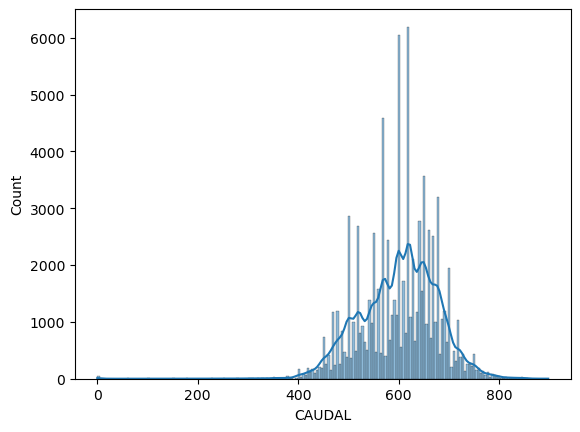

In [4]:
# Histograma de Caudal
sns.histplot(df['CAUDAL'], kde=True)
# Muestra el gráfico
plt.show()

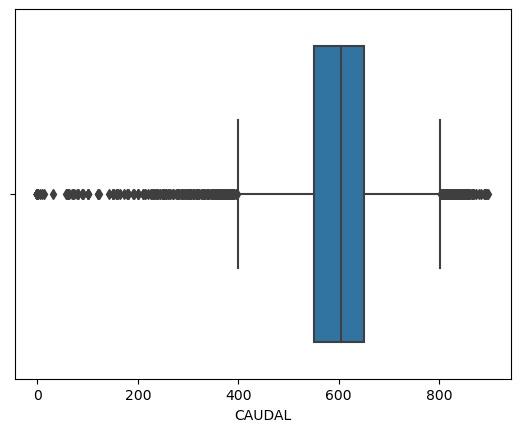

In [5]:
sns.boxplot(x=df['CAUDAL'])
plt.show()

Efectivamente se puede visualizar en el diagrama de cajas que los datos atípico están ubicados muy cerca a los límites dados por el ingeniero Mauricio

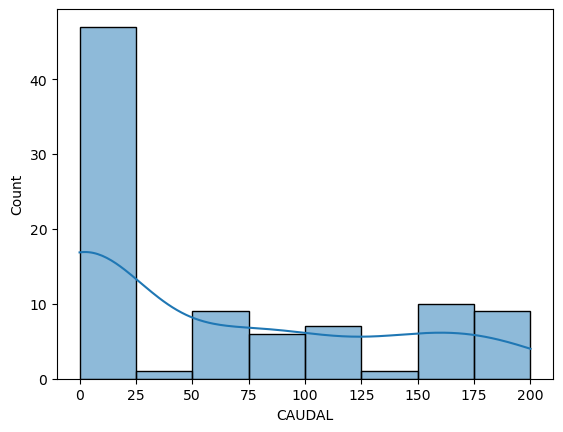

In [6]:
# Histograma de valores atípicos de Caudal
sns.histplot(df[df['CAUDAL']<=200]['CAUDAL'], kde=True)
# Muestra el gráfico
plt.show()

In [7]:
df[df['CAUDAL']==150]

,FECHA,HORA,CAUDAL,CAL_1RIA_KG,CAL_1RIA_DOSIS,AGUA_CRUDA_P.H,AGUA_CRUDA_COLOR,AGUA_CRUDA_NTU,AGUA_CRUDA_ALCALINIDAD,AGUA_CRUDA_CONDUCTIVIDAD,COAGULANTE_GRANULADO,COAGULANTE_LIQUIDO,COAGULANTE_DOSIS,AGUA_TRATADA_CLORO,AGUA_TRATADA_ALCALINIDAD,AGUA_TRATADA_P.H,AGUA_TRATADA_COLOR,AGUA_TRATADA_NTU
62832,2020-03-03,1,150.0,NaN,NaN,8.9,17.4,9.5,26.0,51.5,NaN,NaN,20.0,1.400,16.0,7.10,1.1,1.5
78863,2021-12-30,24,150.0,NaN,NaN,7.2,425.0,322.0,19.0,38.7,NaN,NaN,50.0,1.500,12.0,6.50,4.0,1.5
78864,2021-12-31,1,150.0,NaN,NaN,7.2,425.0,322.0,19.0,38.6,NaN,NaN,45.0,1.500,15.0,6.74,4.0,1.3
79964,2022-02-14,21,150.0,NaN,NaN,6.5,2246.0,1348.0,20.0,24.7,NaN,NaN,90.0,1.477,15.0,6.30,5.0,1.8
80201,2022-02-24,18,150.0,NaN,NaN,7.4,109.0,59.1,21.0,38.6,NaN,NaN,25.0,1.300,10.0,6.80,2.0,1.8


Se hizo una revisión de valores de caudal cero, en unos casos se suspendió el tratamiento de la planta, a eso se debe que el valor de caudal en estos casos sea cero, por ejemplo el 20 de septiembre de 2015 o 5 de marzo del 2020 o hay casos en los que se merma el caudal desde la bocatoma por taponamiento como el 23 de febrero del 2022 y el 9 de abril del 2017

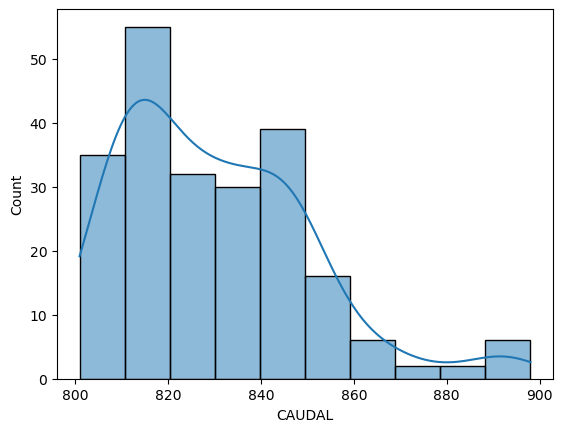

In [8]:
# Histograma de valores atípicos de Caudal
sns.histplot(df[df['CAUDAL']>800]['CAUDAL'], kde=True)
# Muestra el gráfico
plt.show()

In [9]:
df[(df['CAUDAL']>800)]

,FECHA,HORA,CAUDAL,CAL_1RIA_KG,CAL_1RIA_DOSIS,AGUA_CRUDA_P.H,AGUA_CRUDA_COLOR,AGUA_CRUDA_NTU,AGUA_CRUDA_ALCALINIDAD,AGUA_CRUDA_CONDUCTIVIDAD,COAGULANTE_GRANULADO,COAGULANTE_LIQUIDO,COAGULANTE_DOSIS,AGUA_TRATADA_CLORO,AGUA_TRATADA_ALCALINIDAD,AGUA_TRATADA_P.H,AGUA_TRATADA_COLOR,AGUA_TRATADA_NTU
201,2013-01-09,10,815.0,NaN,NaN,6.4,8.5,1.8,NaN,NaN,NaN,NaN,NaN,1.3,NaN,7.5,3.2,0.6
203,2013-01-09,12,846.0,NaN,NaN,6.4,8.5,1.8,NaN,NaN,NaN,NaN,NaN,1.3,NaN,7.5,3.2,0.6
225,2013-01-10,10,815.0,NaN,NaN,7.2,7.7,2.7,NaN,NaN,NaN,NaN,NaN,1.0,NaN,7.4,4.5,1.2
255,2013-01-11,16,854.0,NaN,NaN,6.9,8.7,1.6,NaN,NaN,NaN,NaN,NaN,1.4,NaN,7.1,3.5,0.5
299,2013-01-13,12,898.0,NaN,NaN,7.1,8.1,2.3,NaN,NaN,NaN,NaN,NaN,1.1,NaN,6.9,4.1,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57083,2019-07-07,12,801.0,NaN,NaN,8.3,5.5,1.9,34.0,70.7,NaN,NaN,NaN,1.3,28.0,7.4,3.4,0.6
57192,2019-07-12,1,842.0,NaN,NaN,8.2,4.7,1.9,38.0,71.9,NaN,NaN,NaN,1.3,32.0,7.6,3.4,0.6
57301,2019-07-16,14,890.0,NaN,NaN,8.2,4.6,1.3,37.0,74.1,NaN,NaN,NaN,1.0,37.0,7.9,2.5,0.7
57303,2019-07-16,16,841.0,NaN,NaN,8.1,4.9,1.3,37.0,75.2,NaN,NaN,NaN,1.3,36.0,7.8,2.4,0.7


### AGUA_CRUDA_P.H

In [10]:
# Descripción estadística de pH
df['AGUA_CRUDA_P.H'].describe()

count    86907.000000
mean         7.580451
std          0.288058
min          5.200000
25%          7.400000
50%          7.600000
75%          7.800000
max          9.700000
Name: AGUA_CRUDA_P.H, dtype: float64

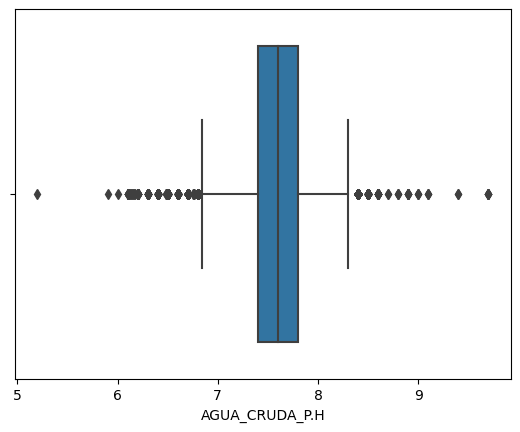

In [11]:
sns.boxplot(x=df['AGUA_CRUDA_P.H'])
plt.show()

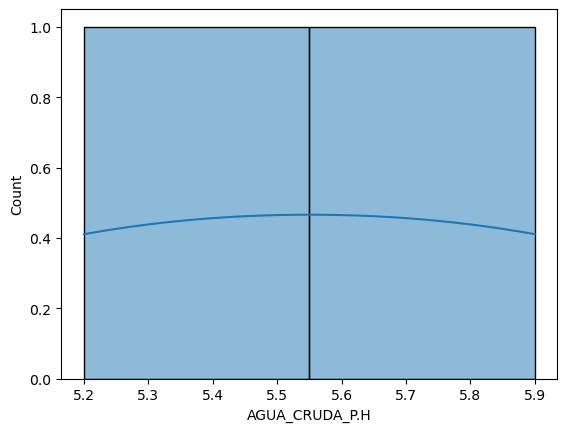

In [12]:
# Histograma de valores atípicos de pH
sns.histplot(df[df['AGUA_CRUDA_P.H']<6]['AGUA_CRUDA_P.H'], kde=True)
# Muestra el gráfico
plt.show()

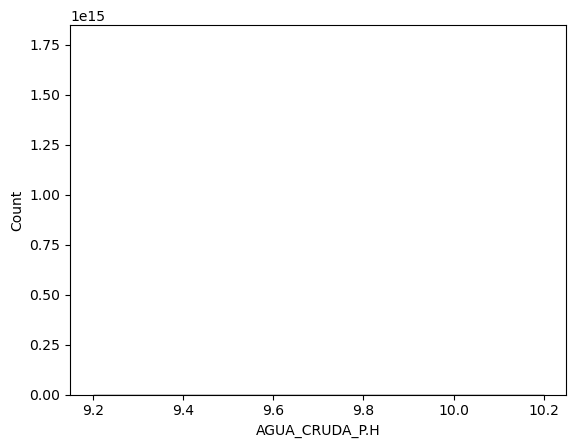

In [13]:
# Histograma de valores atípicos de pH
sns.histplot(df[df['AGUA_CRUDA_P.H']>9.5]['AGUA_CRUDA_P.H'], kde=True)
# Muestra el gráfico
plt.show()

In [14]:
df[(df['AGUA_CRUDA_P.H'] < 6)]

,FECHA,HORA,CAUDAL,CAL_1RIA_KG,CAL_1RIA_DOSIS,AGUA_CRUDA_P.H,AGUA_CRUDA_COLOR,AGUA_CRUDA_NTU,AGUA_CRUDA_ALCALINIDAD,AGUA_CRUDA_CONDUCTIVIDAD,COAGULANTE_GRANULADO,COAGULANTE_LIQUIDO,COAGULANTE_DOSIS,AGUA_TRATADA_CLORO,AGUA_TRATADA_ALCALINIDAD,AGUA_TRATADA_P.H,AGUA_TRATADA_COLOR,AGUA_TRATADA_NTU
32242,2016-09-05,11,660.0,NaN,NaN,5.2,25.0,9.3,3.0,210.0,NaN,NaN,10.0,1.57,NaN,6.5,14.0,2.8
79965,2022-02-14,22,500.0,NaN,NaN,5.9,2387.0,1567.0,18.0,22.1,NaN,NaN,90.0,NaN,15.0,5.8,8.0,2.0


### AGUA_CRUDA_COLOR

In [15]:
# Descripción estadística de color
df['AGUA_CRUDA_COLOR'].describe()

count    81508.000000
mean        27.882252
std         90.431154
min          0.000000
25%          8.000000
50%         11.200000
75%         20.000000
max       4100.000000
Name: AGUA_CRUDA_COLOR, dtype: float64

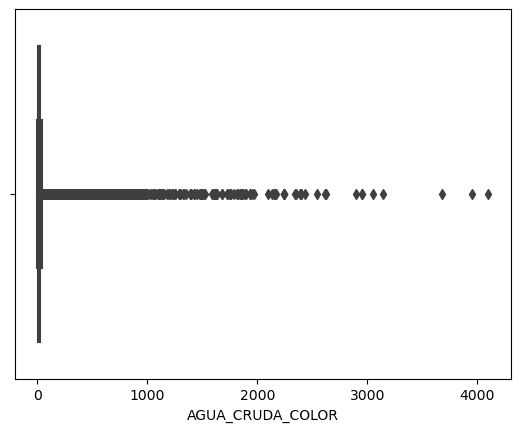

In [16]:
sns.boxplot(x=df['AGUA_CRUDA_COLOR'])
plt.show()

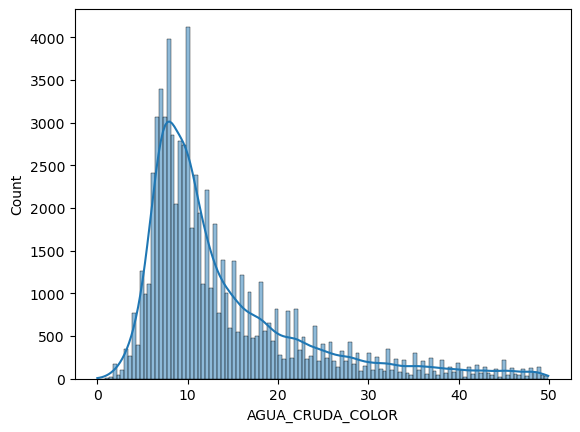

In [17]:
# Histograma de Caudal
sns.histplot(df[df['AGUA_CRUDA_COLOR']<50]['AGUA_CRUDA_COLOR'], kde=True)
# Muestra el gráfico
plt.show()

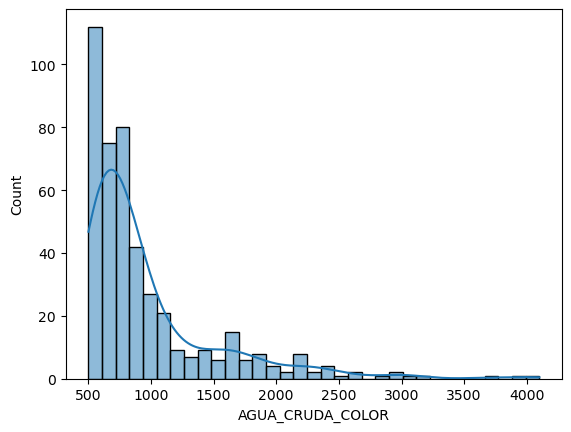

In [18]:
# Histograma de valores atípicos de Color
sns.histplot(df[df['AGUA_CRUDA_COLOR']>500]['AGUA_CRUDA_COLOR'], kde=True)
# Muestra el gráfico
plt.show()

In [19]:
df[(df['AGUA_CRUDA_COLOR'] > 500)]

,FECHA,HORA,CAUDAL,CAL_1RIA_KG,CAL_1RIA_DOSIS,AGUA_CRUDA_P.H,AGUA_CRUDA_COLOR,AGUA_CRUDA_NTU,AGUA_CRUDA_ALCALINIDAD,AGUA_CRUDA_CONDUCTIVIDAD,COAGULANTE_GRANULADO,COAGULANTE_LIQUIDO,COAGULANTE_DOSIS,AGUA_TRATADA_CLORO,AGUA_TRATADA_ALCALINIDAD,AGUA_TRATADA_P.H,AGUA_TRATADA_COLOR,AGUA_TRATADA_NTU
381,2013-01-16,22,536.0,NaN,NaN,7.6,789.0,452.8,NaN,NaN,NaN,NaN,40.0,1.0,NaN,6.5,10.0,1.5
382,2013-01-16,23,546.0,NaN,NaN,7.6,789.0,452.8,NaN,NaN,NaN,NaN,40.0,1.0,NaN,6.5,10.0,1.5
383,2013-01-16,24,640.0,NaN,NaN,7.6,789.0,452.8,NaN,NaN,475.0,NaN,40.0,1.0,NaN,6.5,10.0,1.5
384,2013-01-17,1,528.0,NaN,NaN,7.6,789.0,452.8,NaN,NaN,NaN,NaN,40.0,1.0,NaN,6.5,10.0,1.5
385,2013-01-17,2,522.0,NaN,NaN,7.6,789.0,452.8,NaN,NaN,NaN,NaN,40.0,1.0,NaN,6.5,10.0,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87506,2022-12-26,3,480.0,NaN,NaN,7.1,600.0,415.0,16.0,35.9,NaN,NaN,35.0,NaN,8.0,6.5,3.0,1.7
87619,2022-12-30,20,520.0,NaN,NaN,7.3,4100.0,2000.0,29.0,58.3,NaN,NaN,50.0,NaN,14.0,6.8,2.0,1.3
87620,2022-12-30,21,520.0,NaN,NaN,7.3,2900.0,1500.0,29.0,58.3,NaN,NaN,50.0,NaN,14.0,6.9,2.5,1.3
87621,2022-12-30,22,520.0,NaN,NaN,7.3,2400.0,1100.0,29.0,58.3,NaN,NaN,45.0,1.4,14.0,6.6,2.5,1.3


In [20]:
df[(df['AGUA_CRUDA_COLOR'] > 2000)]

,FECHA,HORA,CAUDAL,CAL_1RIA_KG,CAL_1RIA_DOSIS,AGUA_CRUDA_P.H,AGUA_CRUDA_COLOR,AGUA_CRUDA_NTU,AGUA_CRUDA_ALCALINIDAD,AGUA_CRUDA_CONDUCTIVIDAD,COAGULANTE_GRANULADO,COAGULANTE_LIQUIDO,COAGULANTE_DOSIS,AGUA_TRATADA_CLORO,AGUA_TRATADA_ALCALINIDAD,AGUA_TRATADA_P.H,AGUA_TRATADA_COLOR,AGUA_TRATADA_NTU
929,2013-02-08,18,456.0000,NaN,NaN,7.3,2350.0,5035.0,NaN,NaN,NaN,NaN,70.0,1.000,NaN,6.6,4.3,1.6
1946,2013-03-23,3,457.0000,NaN,NaN,7.1,3050.0,2043.0,NaN,NaN,NaN,NaN,70.0,1.000,NaN,6.8,2.4,0.8
8080,2013-12-03,17,630.8844,NaN,NaN,7.3,3680.0,1840.0,NaN,NaN,NaN,NaN,50.0,1.200,NaN,6.5,8.0,1.6
8081,2013-12-03,18,669.5022,NaN,NaN,7.3,3140.0,1570.0,NaN,NaN,NaN,NaN,50.0,1.300,NaN,6.5,9.4,1.8
16964,2014-12-08,21,357.0000,NaN,NaN,7.1,2954.0,2500.0,21.0,NaN,NaN,NaN,120.0,1.200,NaN,6.5,NaN,0.8
16965,2014-12-08,22,180.0000,NaN,NaN,7.0,2954.0,2400.0,NaN,NaN,600.0,NaN,120.0,1.200,NaN,6.5,NaN,0.8
16971,2014-12-09,4,600.0000,NaN,NaN,7.0,2400.0,1786.0,NaN,NaN,NaN,NaN,110.0,1.200,NaN,6.5,NaN,0.8
16972,2014-12-09,5,610.0000,NaN,NaN,7.0,2150.0,1433.0,NaN,NaN,NaN,NaN,80.0,1.200,NaN,6.5,NaN,1.3
44616,2018-02-03,1,675.0000,NaN,NaN,7.5,2245.0,1884.0,26.0,55.4,NaN,NaN,60.0,1.300,NaN,7.0,5.1,1.1
44617,2018-02-03,2,569.0000,NaN,NaN,7.5,2245.0,1884.0,26.0,55.4,NaN,NaN,60.0,1.300,NaN,7.0,5.1,1.6


### AGUA_CRUDA_NTU

In [21]:
# Descripción estadística de turbiedad
df['AGUA_CRUDA_NTU'].describe()

count    87154.000000
mean        15.003719
std         69.924379
min          0.400000
25%          2.200000
50%          3.000000
75%          6.700000
max       5035.000000
Name: AGUA_CRUDA_NTU, dtype: float64

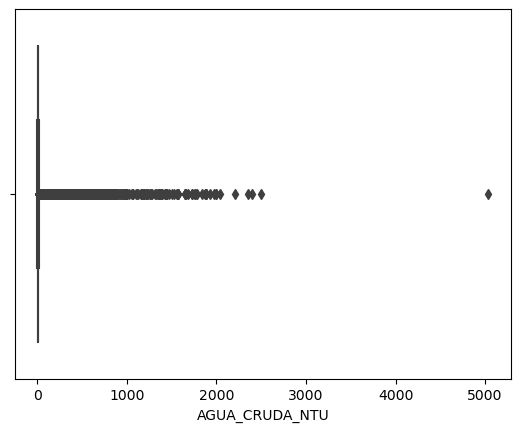

In [22]:
sns.boxplot(x=df['AGUA_CRUDA_NTU'])
plt.show()

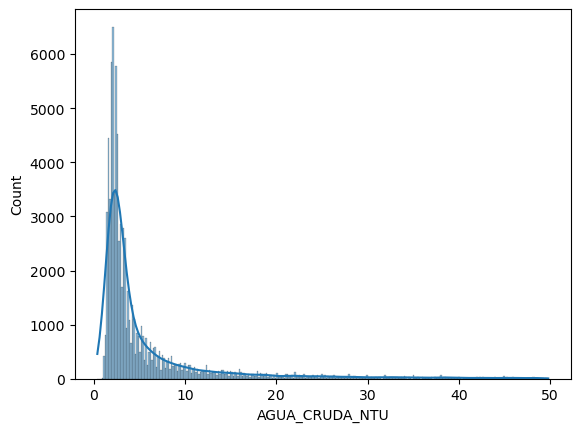

In [23]:
# Histograma de Caudal
sns.histplot(df[df['AGUA_CRUDA_NTU']<50]['AGUA_CRUDA_NTU'], kde=True)
# Muestra el gráfico
plt.show()

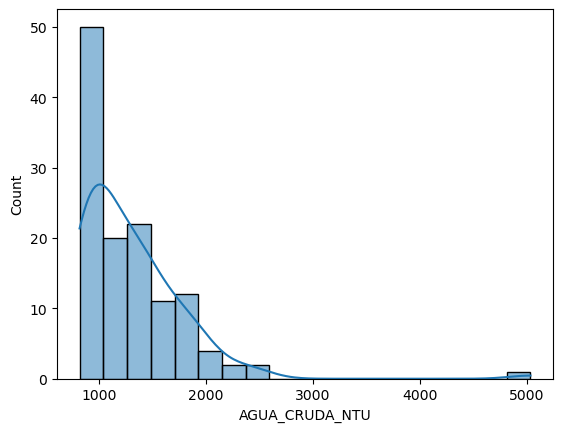

In [24]:
# Histograma de valores atípicos de turbiedad
sns.histplot(df[df['AGUA_CRUDA_NTU']>800]['AGUA_CRUDA_NTU'], kde=True)
# Muestra el gráfico
plt.show()

In [25]:
df[(df['AGUA_CRUDA_NTU'] > 800)]

,FECHA,HORA,CAUDAL,CAL_1RIA_KG,CAL_1RIA_DOSIS,AGUA_CRUDA_P.H,AGUA_CRUDA_COLOR,AGUA_CRUDA_NTU,AGUA_CRUDA_ALCALINIDAD,AGUA_CRUDA_CONDUCTIVIDAD,COAGULANTE_GRANULADO,COAGULANTE_LIQUIDO,COAGULANTE_DOSIS,AGUA_TRATADA_CLORO,AGUA_TRATADA_ALCALINIDAD,AGUA_TRATADA_P.H,AGUA_TRATADA_COLOR,AGUA_TRATADA_NTU
929,2013-02-08,18,456.0000,NaN,NaN,7.3,2350.0,5035.0,NaN,NaN,NaN,NaN,70.0,1.0,NaN,6.6,4.3,1.6
1946,2013-03-23,3,457.0000,NaN,NaN,7.1,3050.0,2043.0,NaN,NaN,NaN,NaN,70.0,1.0,NaN,6.8,2.4,0.8
6858,2013-10-13,19,647.0000,NaN,NaN,7.6,725.6,864.1,NaN,NaN,NaN,NaN,40.0,1.2,NaN,6.8,8.6,1.3
8080,2013-12-03,17,630.8844,NaN,NaN,7.3,3680.0,1840.0,NaN,NaN,NaN,NaN,50.0,1.2,NaN,6.5,8.0,1.6
8081,2013-12-03,18,669.5022,NaN,NaN,7.3,3140.0,1570.0,NaN,NaN,NaN,NaN,50.0,1.3,NaN,6.5,9.4,1.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86947,2022-12-02,20,600.0000,NaN,NaN,7.5,1786.0,1678.0,22.0,40.2,NaN,NaN,40.0,NaN,12.0,6.8,2.0,1.7
86948,2022-12-02,21,600.0000,NaN,NaN,7.4,1385.0,1265.0,17.0,39.5,NaN,NaN,40.0,NaN,12.0,6.7,2.0,1.7
87619,2022-12-30,20,520.0000,NaN,NaN,7.3,4100.0,2000.0,29.0,58.3,NaN,NaN,50.0,NaN,14.0,6.8,2.0,1.3
87620,2022-12-30,21,520.0000,NaN,NaN,7.3,2900.0,1500.0,29.0,58.3,NaN,NaN,50.0,NaN,14.0,6.9,2.5,1.3


In [26]:
df[(df['AGUA_CRUDA_NTU'] >= 2000)]

,FECHA,HORA,CAUDAL,CAL_1RIA_KG,CAL_1RIA_DOSIS,AGUA_CRUDA_P.H,AGUA_CRUDA_COLOR,AGUA_CRUDA_NTU,AGUA_CRUDA_ALCALINIDAD,AGUA_CRUDA_CONDUCTIVIDAD,COAGULANTE_GRANULADO,COAGULANTE_LIQUIDO,COAGULANTE_DOSIS,AGUA_TRATADA_CLORO,AGUA_TRATADA_ALCALINIDAD,AGUA_TRATADA_P.H,AGUA_TRATADA_COLOR,AGUA_TRATADA_NTU
929,2013-02-08,18,456.0,NaN,NaN,7.3,2350.0,5035.0,NaN,NaN,NaN,NaN,70.0,1.0,NaN,6.6,4.3,1.6
1946,2013-03-23,3,457.0,NaN,NaN,7.1,3050.0,2043.0,NaN,NaN,NaN,NaN,70.0,1.0,NaN,6.8,2.4,0.8
16964,2014-12-08,21,357.0,NaN,NaN,7.1,2954.0,2500.0,21.0,NaN,NaN,NaN,120.0,1.2,NaN,6.5,NaN,0.8
16965,2014-12-08,22,180.0,NaN,NaN,7.0,2954.0,2400.0,NaN,NaN,600.0,NaN,120.0,1.2,NaN,6.5,NaN,0.8
78048,2021-11-27,1,450.0,NaN,NaN,7.2,3950.0,2350.0,18.0,38.0,NaN,NaN,NaN,1.3,10.0,6.6,2.0,1.8
82315,2022-05-23,20,270.0,NaN,NaN,7.6,2542.0,2210.0,15.0,40.1,NaN,NaN,120.0,NaN,8.0,6.7,4.0,1.1
87619,2022-12-30,20,520.0,NaN,NaN,7.3,4100.0,2000.0,29.0,58.3,NaN,NaN,50.0,NaN,14.0,6.8,2.0,1.3


### AGUA_CRUDA_ALCALINIDAD

In [27]:
# Descripción estadística de alcalinidad
df['AGUA_CRUDA_ALCALINIDAD'].describe()

count    68682.000000
mean        33.220616
std          7.024153
min          0.000000
25%         28.400000
50%         33.400000
75%         38.000000
max        321.800000
Name: AGUA_CRUDA_ALCALINIDAD, dtype: float64

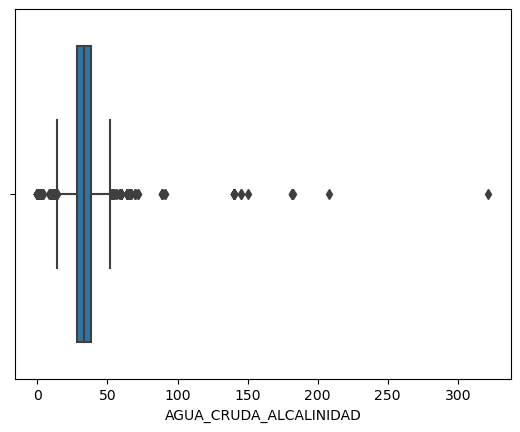

In [28]:
sns.boxplot(x=df['AGUA_CRUDA_ALCALINIDAD'])
plt.show()

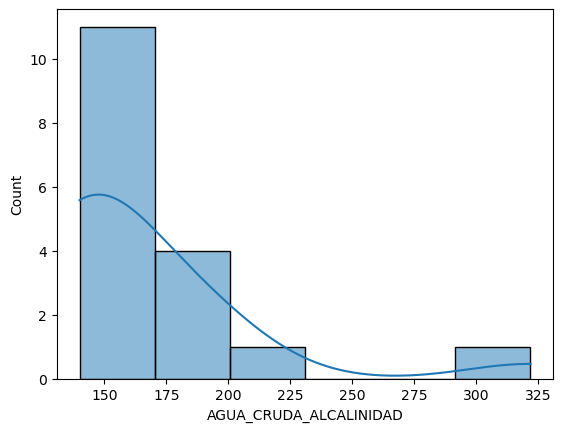

In [29]:
# Histograma de valores atípicos de turbiedad
sns.histplot(df[df['AGUA_CRUDA_ALCALINIDAD']>100]['AGUA_CRUDA_ALCALINIDAD'], kde=True)
# Muestra el gráfico
plt.show()

In [30]:
df[(df['AGUA_CRUDA_ALCALINIDAD'] > 100)]

,FECHA,HORA,CAUDAL,CAL_1RIA_KG,CAL_1RIA_DOSIS,AGUA_CRUDA_P.H,AGUA_CRUDA_COLOR,AGUA_CRUDA_NTU,AGUA_CRUDA_ALCALINIDAD,AGUA_CRUDA_CONDUCTIVIDAD,COAGULANTE_GRANULADO,COAGULANTE_LIQUIDO,COAGULANTE_DOSIS,AGUA_TRATADA_CLORO,AGUA_TRATADA_ALCALINIDAD,AGUA_TRATADA_P.H,AGUA_TRATADA_COLOR,AGUA_TRATADA_NTU
38993,2017-06-13,18,678.0,NaN,NaN,7.5,22.90,4.70,208.0,58.9,NaN,NaN,20.0,1.3,NaN,6.9,7.8,1.8
46012,2018-04-02,5,680.0,NaN,NaN,7.3,236.20,949.00,182.3,32.2,NaN,NaN,40.0,1.2,NaN,6.7,4.1,2.0
46013,2018-04-02,6,797.0,NaN,NaN,7.3,164.50,448.00,182.0,32.0,NaN,NaN,40.0,1.3,NaN,6.9,6.0,2.0
46014,2018-04-02,7,695.0,NaN,NaN,7.3,678.00,800.00,182.0,32.0,NaN,NaN,55.0,1.3,NaN,6.9,8.0,2.0
46015,2018-04-02,8,675.0,NaN,NaN,7.3,545.00,254.00,182.0,32.0,NaN,NaN,55.0,1.3,NaN,6.9,10.0,2.0
47584,2018-06-06,17,620.0,NaN,NaN,7.7,7.40,4.20,140.0,92.9,NaN,NaN,NaN,1.2,NaN,7.4,5.2,1.4
47591,2018-06-06,24,600.0,NaN,NaN,7.7,7.80,3.20,140.0,92.4,NaN,NaN,NaN,1.3,NaN,7.4,3.1,1.3
47592,2018-06-07,1,580.0,NaN,NaN,7.7,7.40,3.00,140.0,92.1,NaN,NaN,0.0,1.2,NaN,7.2,3.1,1.3
47593,2018-06-07,2,580.0,NaN,NaN,7.7,7.40,3.00,140.0,92.1,NaN,NaN,0.0,1.2,NaN,7.2,3.1,1.3
47594,2018-06-07,3,580.0,NaN,NaN,7.7,7.40,3.00,140.0,92.1,NaN,NaN,0.0,1.2,NaN,7.2,3.1,1.3


### AGUA_CRUDA_CONDUCTIVIDAD

In [31]:
# Descripción estadística de alcalinidad
df['AGUA_CRUDA_CONDUCTIVIDAD'].describe()

count    60092.000000
mean        72.363419
std         27.476549
min          0.000000
25%         56.900000
50%         69.700000
75%         81.600000
max        921.000000
Name: AGUA_CRUDA_CONDUCTIVIDAD, dtype: float64

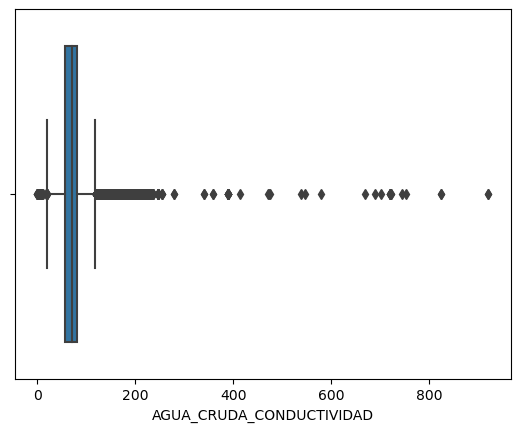

In [32]:
sns.boxplot(x=df['AGUA_CRUDA_CONDUCTIVIDAD'])
plt.show()

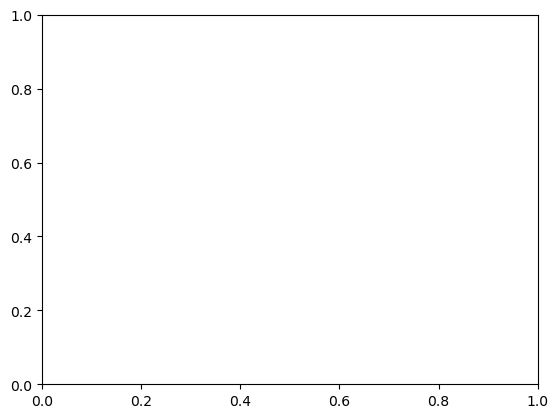

In [33]:
# Histograma de valores atípicos de turbiedad
sns.histplot(df[df['AGUA_CRUDA_CONDUCTIVIDAD']>12800]['AGUA_CRUDA_CONDUCTIVIDAD'], kde=True)
# Muestra el gráfico
plt.show()

### AGUA_TRATADA_P.H

In [34]:
# Descripción estadística de alcalinidad
df['AGUA_TRATADA_P.H'].describe()

count    84656.000000
mean         7.085663
std          0.344211
min          0.650000
25%          6.900000
50%          7.100000
75%          7.300000
max          9.200000
Name: AGUA_TRATADA_P.H, dtype: float64

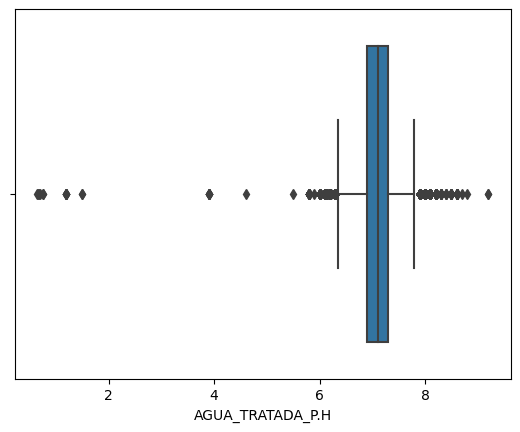

In [35]:
sns.boxplot(x=df['AGUA_TRATADA_P.H'])
plt.show()

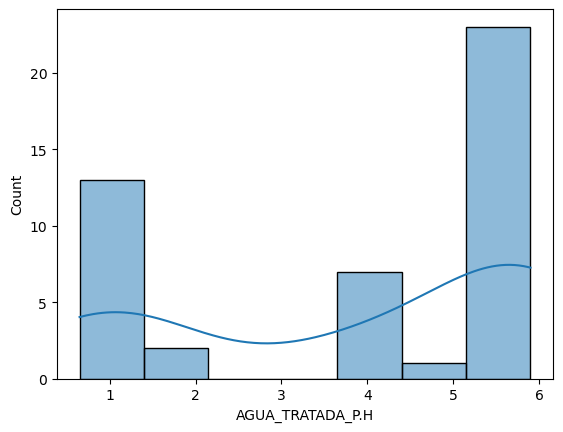

In [36]:
# Histograma de valores atípicos de pH
sns.histplot(df[df['AGUA_TRATADA_P.H']<6]['AGUA_TRATADA_P.H'], kde=True)
# Muestra el gráfico
plt.show()

In [37]:
df[(df['AGUA_TRATADA_P.H'] >0) & (df['AGUA_TRATADA_P.H'] < 1)]

,FECHA,HORA,CAUDAL,CAL_1RIA_KG,CAL_1RIA_DOSIS,AGUA_CRUDA_P.H,AGUA_CRUDA_COLOR,AGUA_CRUDA_NTU,AGUA_CRUDA_ALCALINIDAD,AGUA_CRUDA_CONDUCTIVIDAD,COAGULANTE_GRANULADO,COAGULANTE_LIQUIDO,COAGULANTE_DOSIS,AGUA_TRATADA_CLORO,AGUA_TRATADA_ALCALINIDAD,AGUA_TRATADA_P.H,AGUA_TRATADA_COLOR,AGUA_TRATADA_NTU
24218,2015-10-07,3,515.0,NaN,NaN,7.2,21.00,3.8,NaN,NaN,NaN,NaN,25.0,1.20,NaN,0.68,NaN,0.9
37549,2017-04-14,14,560.0,NaN,NaN,7.5,NaN,2.6,30.8,61.4,NaN,NaN,0.0,1.10,NaN,0.67,NaN,0.8
58725,2019-09-13,22,650.0,NaN,NaN,7.4,24.20,5.3,38.0,101.8,250.0,NaN,20.0,1.50,20.0,0.69,4.6,1.7
62301,2020-02-09,22,600.0,NaN,NaN,7.7,15.28,15.2,35.0,80.7,NaN,NaN,25.0,1.30,32.0,0.75,3.8,0.9
62302,2020-02-09,23,600.0,NaN,NaN,7.7,42.20,21.5,34.0,80.7,NaN,NaN,25.0,1.30,32.0,0.75,3.5,0.8
73114,2021-05-05,11,595.0,NaN,NaN,7.0,17.40,6.2,27.0,46.8,NaN,NaN,25.0,1.35,16.0,0.65,3.4,1.0


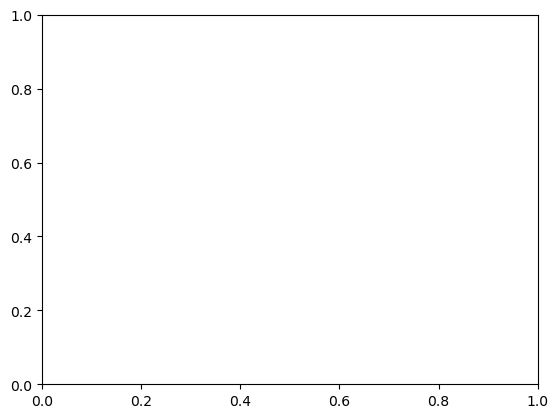

In [38]:
# Histograma de valores atípicos de pH
sns.histplot(df[df['AGUA_TRATADA_P.H']>9.5]['AGUA_TRATADA_P.H'], kde=True)
# Muestra el gráfico
plt.show()

### AGUA_TRATADA_COLOR

In [39]:
# Descripción estadística de alcalinidad
df['AGUA_TRATADA_COLOR'].describe()

count    78696.000000
mean         4.472252
std          2.292368
min          0.000000
25%          2.900000
50%          4.100000
75%          5.600000
max         19.000000
Name: AGUA_TRATADA_COLOR, dtype: float64

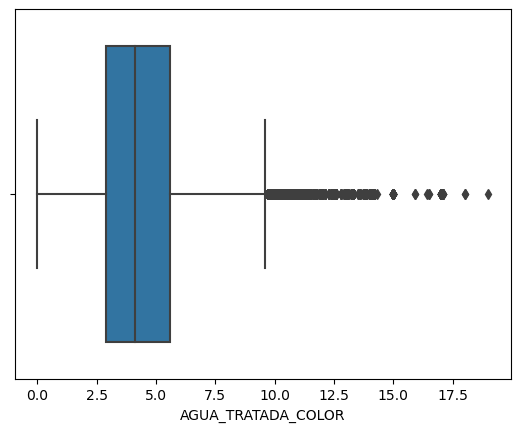

In [40]:
sns.boxplot(x=df['AGUA_TRATADA_COLOR'])
plt.show()

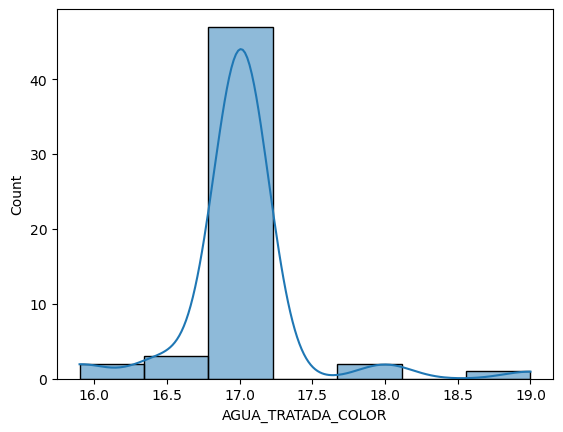

In [41]:
# Histograma de valores atípicos de pH
sns.histplot(df[df['AGUA_TRATADA_COLOR']>15]['AGUA_TRATADA_COLOR'], kde=True)
# Muestra el gráfico
plt.show()

### AGUA_TRATADA_NTU

In [42]:
# Descripción estadística de alcalinidad
df['AGUA_TRATADA_NTU'].describe()

count    84833.000000
mean         1.068814
std          0.368358
min          0.000000
25%          0.800000
50%          1.000000
75%          1.300000
max          6.500000
Name: AGUA_TRATADA_NTU, dtype: float64

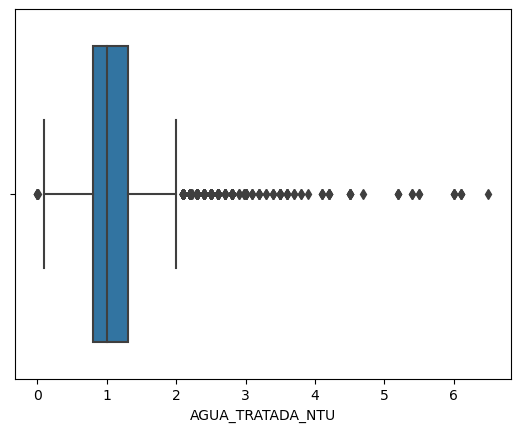

In [43]:
sns.boxplot(x=df['AGUA_TRATADA_NTU'])
plt.show()

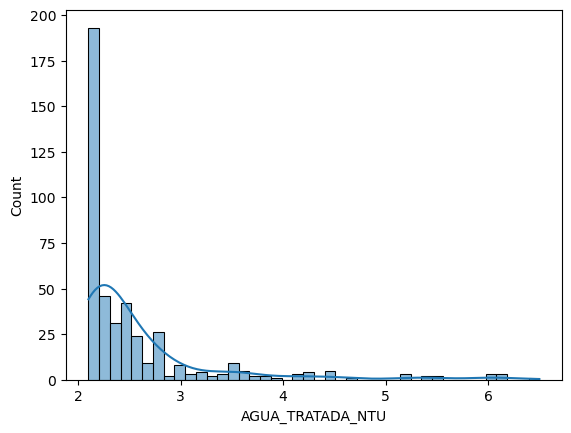

In [44]:
# Histograma de valores atípicos de pH
sns.histplot(df[df['AGUA_TRATADA_NTU']>2]['AGUA_TRATADA_NTU'], kde=True)
# Muestra el gráfico
plt.show()

In [45]:
df[(df['AGUA_TRATADA_NTU'] > 2)]

,FECHA,HORA,CAUDAL,CAL_1RIA_KG,CAL_1RIA_DOSIS,AGUA_CRUDA_P.H,AGUA_CRUDA_COLOR,AGUA_CRUDA_NTU,AGUA_CRUDA_ALCALINIDAD,AGUA_CRUDA_CONDUCTIVIDAD,COAGULANTE_GRANULADO,COAGULANTE_LIQUIDO,COAGULANTE_DOSIS,AGUA_TRATADA_CLORO,AGUA_TRATADA_ALCALINIDAD,AGUA_TRATADA_P.H,AGUA_TRATADA_COLOR,AGUA_TRATADA_NTU
472,2013-01-20,17,832.0,NaN,NaN,8.4,12.1,5.8,NaN,NaN,NaN,NaN,NaN,0.2,NaN,8.1,10.0,2.1
473,2013-01-20,18,811.0,NaN,NaN,8.4,12.3,5.6,NaN,NaN,NaN,NaN,NaN,0.3,NaN,8.1,10.0,2.1
474,2013-01-20,19,607.0,NaN,NaN,8.3,12.0,5.6,NaN,NaN,NaN,NaN,NaN,0.6,NaN,8.1,10.0,2.1
477,2013-01-20,22,586.0,NaN,NaN,7.8,11.0,4.5,NaN,NaN,NaN,NaN,NaN,1.4,NaN,7.5,10.0,2.1
478,2013-01-20,23,567.0,NaN,NaN,7.8,11.0,4.4,NaN,NaN,NaN,NaN,NaN,1.4,NaN,7.5,10.0,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87511,2022-12-26,8,620.0,NaN,NaN,7.1,220.0,170.0,17.0,48.2,NaN,NaN,35.0,NaN,9.0,6.4,3.0,2.2
87628,2022-12-31,5,570.0,NaN,NaN,7.2,52.0,36.7,28.0,56.8,NaN,NaN,25.0,1.4,13.0,6.7,12.0,4.5
87629,2022-12-31,6,600.0,NaN,NaN,7.2,43.0,31.6,27.0,57.2,NaN,NaN,25.0,NaN,15.0,6.5,13.0,6.5
87630,2022-12-31,7,620.0,NaN,NaN,7.1,37.0,23.4,28.0,59.0,475.0,NaN,25.0,1.5,13.0,6.5,13.0,6.0


### AGUA_TRATADA_ALCALINIDAD

In [46]:
# Descripción estadística de alcalinidad
df['AGUA_TRATADA_ALCALINIDAD'].describe()

count    36156.000000
mean        25.769146
std          8.942305
min          0.000000
25%         18.000000
50%         26.000000
75%         33.000000
max        189.000000
Name: AGUA_TRATADA_ALCALINIDAD, dtype: float64

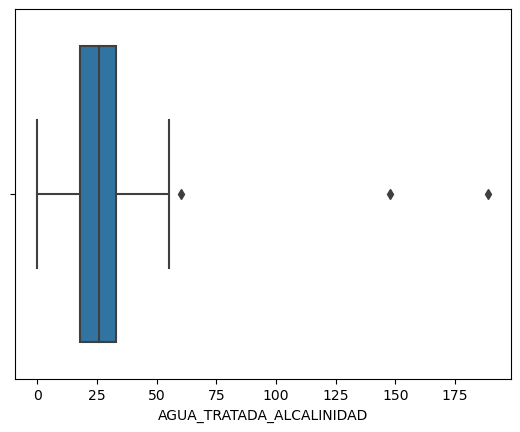

In [47]:
sns.boxplot(x=df['AGUA_TRATADA_ALCALINIDAD'])
plt.show()

### AGUA_TRATADA_CLORO

In [48]:
# Descripción estadística de cloro
df['AGUA_TRATADA_CLORO'].describe()

count    77353.000000
mean         1.211857
std          0.196221
min          0.000000
25%          1.100000
50%          1.200000
75%          1.400000
max          3.000000
Name: AGUA_TRATADA_CLORO, dtype: float64

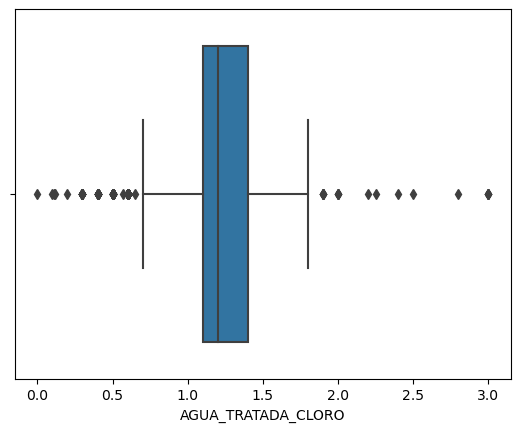

In [49]:
sns.boxplot(x=df['AGUA_TRATADA_CLORO'])
plt.show()

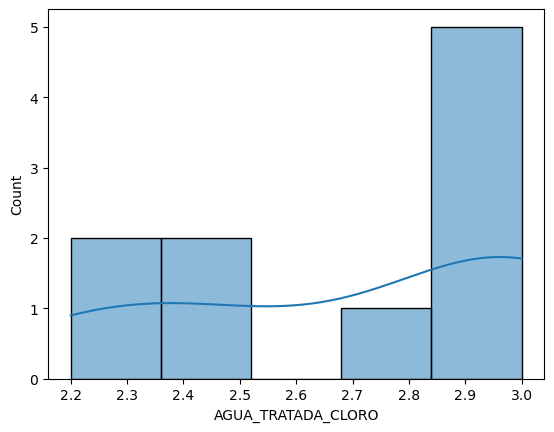

In [50]:
# Histograma de valores atípicos de pH
sns.histplot(df[df['AGUA_TRATADA_CLORO']>2]['AGUA_TRATADA_CLORO'], kde=True)
# Muestra el gráfico
plt.show()

In [51]:
df[(df['AGUA_TRATADA_CLORO'] >2) ]

,FECHA,HORA,CAUDAL,CAL_1RIA_KG,CAL_1RIA_DOSIS,AGUA_CRUDA_P.H,AGUA_CRUDA_COLOR,AGUA_CRUDA_NTU,AGUA_CRUDA_ALCALINIDAD,AGUA_CRUDA_CONDUCTIVIDAD,COAGULANTE_GRANULADO,COAGULANTE_LIQUIDO,COAGULANTE_DOSIS,AGUA_TRATADA_CLORO,AGUA_TRATADA_ALCALINIDAD,AGUA_TRATADA_P.H,AGUA_TRATADA_COLOR,AGUA_TRATADA_NTU
227,2013-01-10,12,794.0,NaN,NaN,7.2,7.7,2.90,NaN,NaN,NaN,NaN,NaN,3.00,NaN,7.6,4.70,1.4
228,2013-01-10,13,766.0,NaN,NaN,7.2,7.7,2.10,NaN,NaN,NaN,NaN,NaN,3.00,NaN,7.7,4.80,1.5
229,2013-01-10,14,789.0,NaN,NaN,7.2,7.7,2.11,NaN,NaN,NaN,NaN,NaN,3.00,NaN,7.8,4.90,1.6
230,2013-01-10,15,778.0,NaN,NaN,7.2,7.7,2.12,NaN,NaN,NaN,NaN,NaN,3.00,NaN,7.9,4.10,1.7
231,2013-01-10,16,750.0,NaN,NaN,7.2,7.7,2.13,NaN,NaN,NaN,NaN,NaN,3.00,NaN,7.1,4.11,1.8
54023,2019-03-01,24,650.0,NaN,NaN,8.1,320.0,475.00,36.2,62.1,500.0,NaN,40.0,2.50,33.6,7.9,4.80,1.5
56704,2019-06-21,17,702.0,NaN,NaN,7.8,27.6,3.90,26.0,50.3,NaN,NaN,35.0,2.80,16.0,6.8,9.30,2.9
66876,2020-08-18,13,645.0,NaN,NaN,8.0,7.8,2.50,42.0,83.4,NaN,NaN,0.0,2.25,37.0,7.3,3.80,0.8
74202,2021-06-19,19,520.0,NaN,NaN,7.5,6.6,2.20,32.0,61.4,NaN,NaN,0.0,2.40,27.0,7.3,3.70,1.0
81624,2022-04-25,1,520.0,NaN,NaN,7.3,76.0,30.00,27.0,48.2,NaN,NaN,25.0,2.20,17.0,6.7,2.00,1.6


## Ánalisis sin outliers

In [52]:
df_prueba=df[df.AGUA_CRUDA_COLOR<500]
df_prueba = df_prueba[df_prueba.AGUA_CRUDA_NTU < 800]
df_prueba = df_prueba[(df_prueba.CAUDAL <= 800) & (df_prueba.CAUDAL > 200)]
df_prueba = df_prueba[df_prueba.AGUA_CRUDA_ALCALINIDAD < 100]
df_prueba 

,FECHA,HORA,CAUDAL,CAL_1RIA_KG,CAL_1RIA_DOSIS,AGUA_CRUDA_P.H,AGUA_CRUDA_COLOR,AGUA_CRUDA_NTU,AGUA_CRUDA_ALCALINIDAD,AGUA_CRUDA_CONDUCTIVIDAD,COAGULANTE_GRANULADO,COAGULANTE_LIQUIDO,COAGULANTE_DOSIS,AGUA_TRATADA_CLORO,AGUA_TRATADA_ALCALINIDAD,AGUA_TRATADA_P.H,AGUA_TRATADA_COLOR,AGUA_TRATADA_NTU
10383,2014-03-09,16,580.0,NaN,NaN,7.5,63.3,38.6,20.0,NaN,NaN,NaN,25.0,0.9,NaN,6.7,1.8,1.0
10385,2014-03-09,18,556.0,NaN,NaN,7.5,47.3,17.1,18.0,NaN,NaN,NaN,25.0,0.9,NaN,6.7,1.8,1.0
10387,2014-03-09,20,560.0,NaN,NaN,7.5,47.3,17.1,18.0,NaN,NaN,NaN,25.0,0.9,NaN,6.7,1.8,1.0
10389,2014-03-09,22,550.0,NaN,NaN,7.5,29.0,10.0,18.0,NaN,NaN,NaN,25.0,0.9,NaN,6.7,1.8,1.0
10391,2014-03-09,24,521.0,NaN,NaN,7.1,27.7,9.0,18.0,NaN,NaN,NaN,25.0,0.9,NaN,6.7,1.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87643,2022-12-31,20,600.0,NaN,NaN,7.4,425.0,657.0,25.0,55.5,NaN,NaN,40.0,1.5,17.0,6.6,2.0,1.1
87644,2022-12-31,21,620.0,NaN,NaN,7.5,321.0,404.0,25.0,55.7,NaN,NaN,40.0,NaN,17.0,6.5,2.0,1.1
87645,2022-12-31,22,620.0,NaN,NaN,7.3,322.0,402.0,25.0,55.4,NaN,NaN,40.0,1.6,13.0,6.6,2.0,1.4
87646,2022-12-31,23,510.0,NaN,NaN,7.4,300.0,390.0,25.0,55.5,650.0,NaN,40.0,1.5,14.0,6.8,2.0,1.2


In [53]:
HEADERS_LIQUIDO = ['FECHA', 'HORA', 'CAUDAL', 'AGUA_CRUDA_P.H', 'AGUA_CRUDA_COLOR', 'AGUA_CRUDA_NTU', 'AGUA_CRUDA_ALCALINIDAD', 
                   'AGUA_CRUDA_CONDUCTIVIDAD', 'COAGULANTE_LIQUIDO', 'COAGULANTE_DOSIS','AGUA_TRATADA_CLORO', 
                   'AGUA_TRATADA_ALCALINIDAD', 'AGUA_TRATADA_P.H', 'AGUA_TRATADA_COLOR', 'AGUA_TRATADA_NTU']

HEADERS_GRANULADO = ['FECHA', 'HORA', 'CAUDAL', 'CAL_1RIA_KG', 'CAL_1RIA_DOSIS', 'AGUA_CRUDA_P.H', 'AGUA_CRUDA_COLOR', 
                     'AGUA_CRUDA_NTU', 'AGUA_CRUDA_ALCALINIDAD', 'AGUA_CRUDA_CONDUCTIVIDAD', 'COAGULANTE_GRANULADO', 
                     'COAGULANTE_DOSIS', 'AGUA_TRATADA_CLORO', 'AGUA_TRATADA_ALCALINIDAD', 'AGUA_TRATADA_P.H', 
                     'AGUA_TRATADA_COLOR', 'AGUA_TRATADA_NTU']

In [54]:
df_liquido = df_prueba[df_prueba['COAGULANTE_LIQUIDO'].notnull()]
df_liquido = df_liquido[HEADERS_LIQUIDO]
df_granulado = df[df['COAGULANTE_LIQUIDO'].isnull()]
df_granulado = df_granulado[HEADERS_GRANULADO]

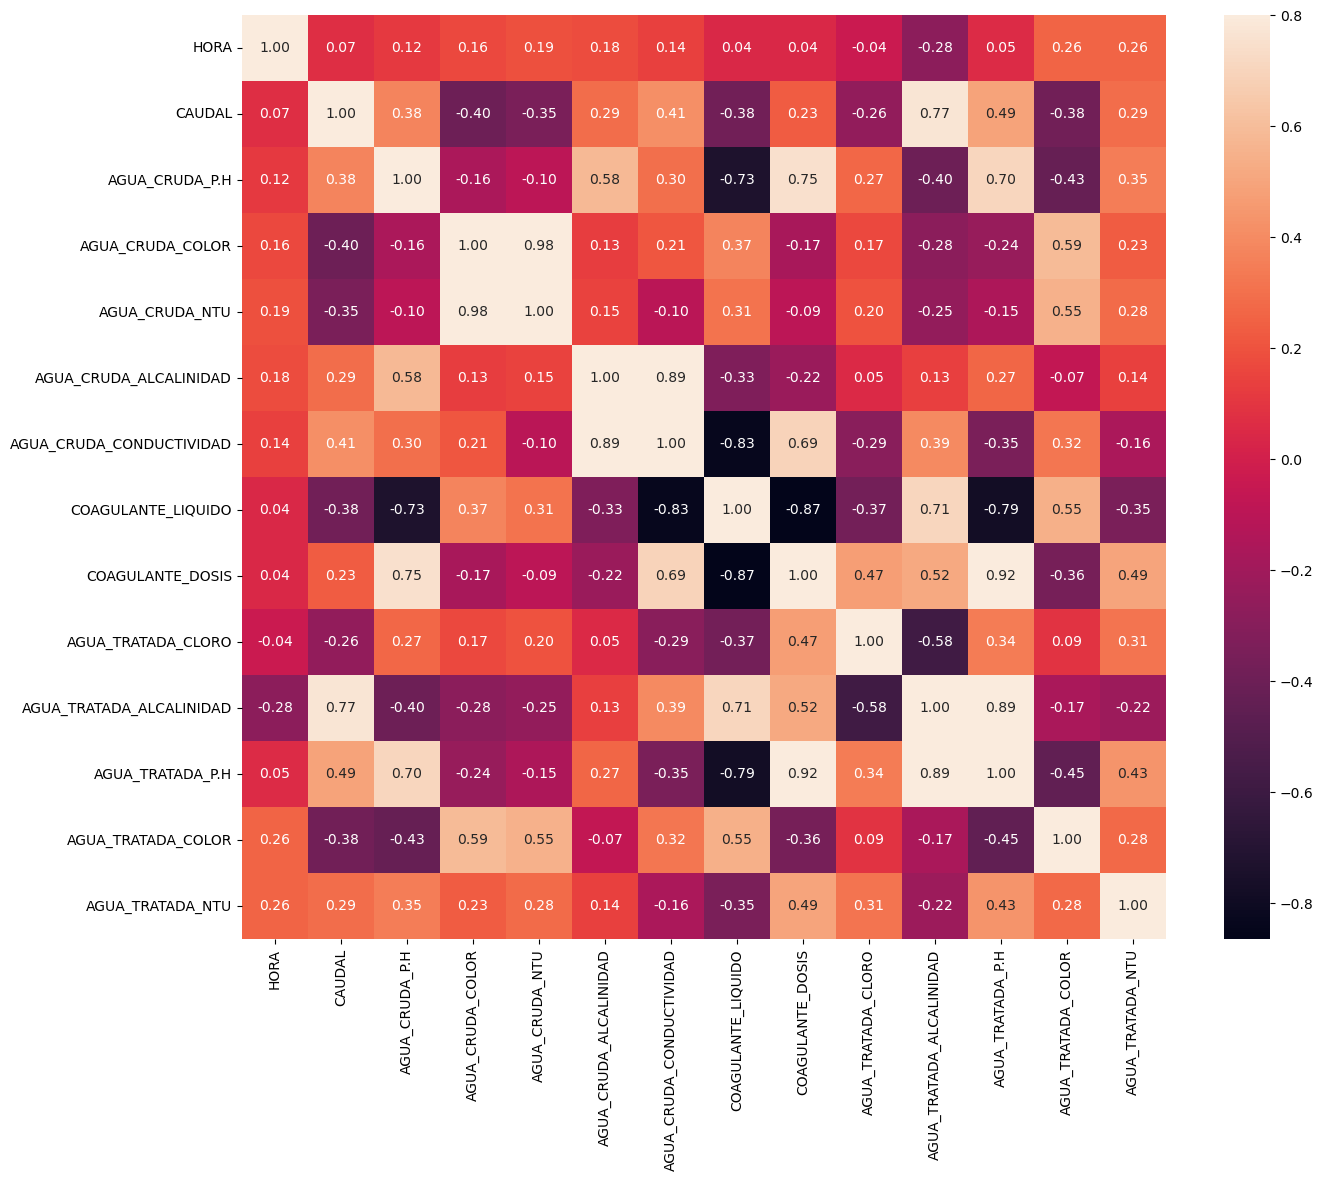

In [55]:
# Matriz de correlación:
corrmat = df_liquido.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corrmat, vmax=.8, annot = True, fmt = '.2f', annot_kws = {'size': 10}, square=True);

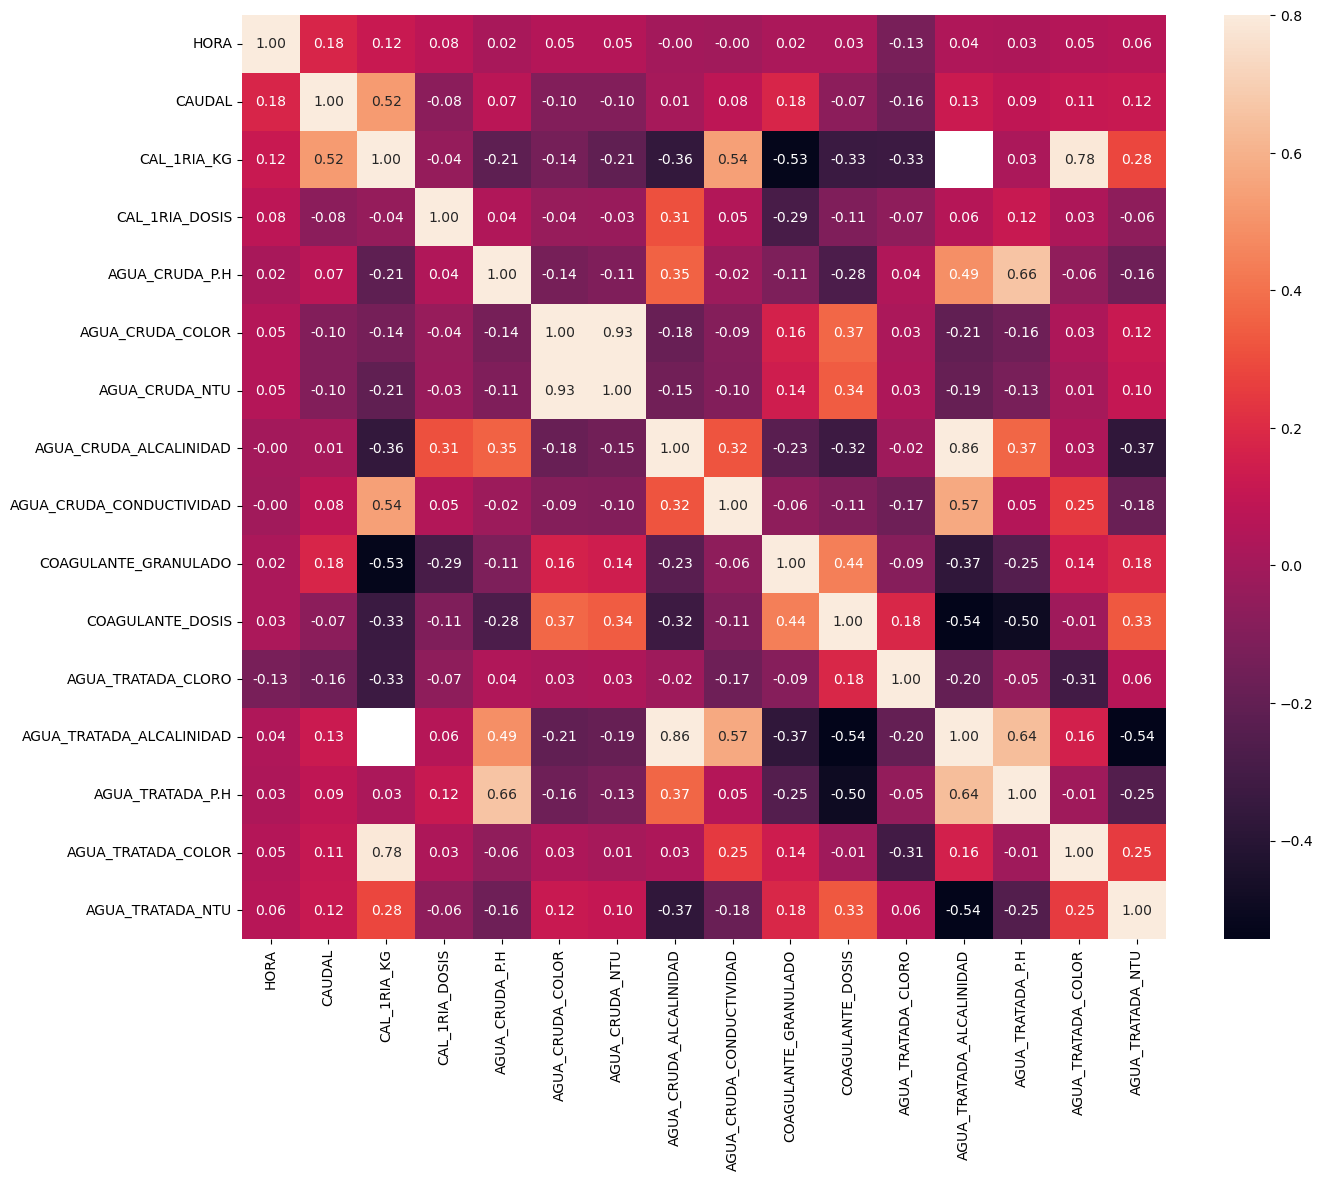

In [56]:
# Matriz de correlación:
corrmat = df_granulado.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corrmat, vmax=.8, annot = True, fmt = '.2f', annot_kws = {'size': 10}, square=True);

In [57]:
df_prueba[['AGUA_TRATADA_CLORO', 'AGUA_TRATADA_ALCALINIDAD', 'AGUA_TRATADA_P.H', 'AGUA_TRATADA_COLOR', 'AGUA_TRATADA_NTU']] = df_prueba[['AGUA_TRATADA_CLORO', 'AGUA_TRATADA_ALCALINIDAD', 'AGUA_TRATADA_P.H', 'AGUA_TRATADA_COLOR', 'AGUA_TRATADA_NTU']].shift(-3)

In [58]:
HEADERS_LIQUIDO = ['FECHA', 'HORA', 'CAUDAL', 'AGUA_CRUDA_P.H', 'AGUA_CRUDA_COLOR', 'AGUA_CRUDA_NTU', 'AGUA_CRUDA_ALCALINIDAD', 
                   'AGUA_CRUDA_CONDUCTIVIDAD', 'COAGULANTE_LIQUIDO', 'COAGULANTE_DOSIS','AGUA_TRATADA_CLORO', 
                   'AGUA_TRATADA_ALCALINIDAD', 'AGUA_TRATADA_P.H', 'AGUA_TRATADA_COLOR', 'AGUA_TRATADA_NTU']

HEADERS_GRANULADO = ['FECHA', 'HORA', 'CAUDAL', 'CAL_1RIA_KG', 'CAL_1RIA_DOSIS', 'AGUA_CRUDA_P.H', 'AGUA_CRUDA_COLOR', 
                     'AGUA_CRUDA_NTU', 'AGUA_CRUDA_ALCALINIDAD', 'AGUA_CRUDA_CONDUCTIVIDAD', 'COAGULANTE_GRANULADO', 
                     'COAGULANTE_DOSIS', 'AGUA_TRATADA_CLORO', 'AGUA_TRATADA_ALCALINIDAD', 'AGUA_TRATADA_P.H', 
                     'AGUA_TRATADA_COLOR', 'AGUA_TRATADA_NTU']

In [59]:
df_liquido = df_prueba[df_prueba['COAGULANTE_LIQUIDO'].notnull()]
df_liquido = df_liquido[HEADERS_LIQUIDO]
df_granulado = df[df['COAGULANTE_LIQUIDO'].isnull()]
df_granulado = df_granulado[HEADERS_GRANULADO]

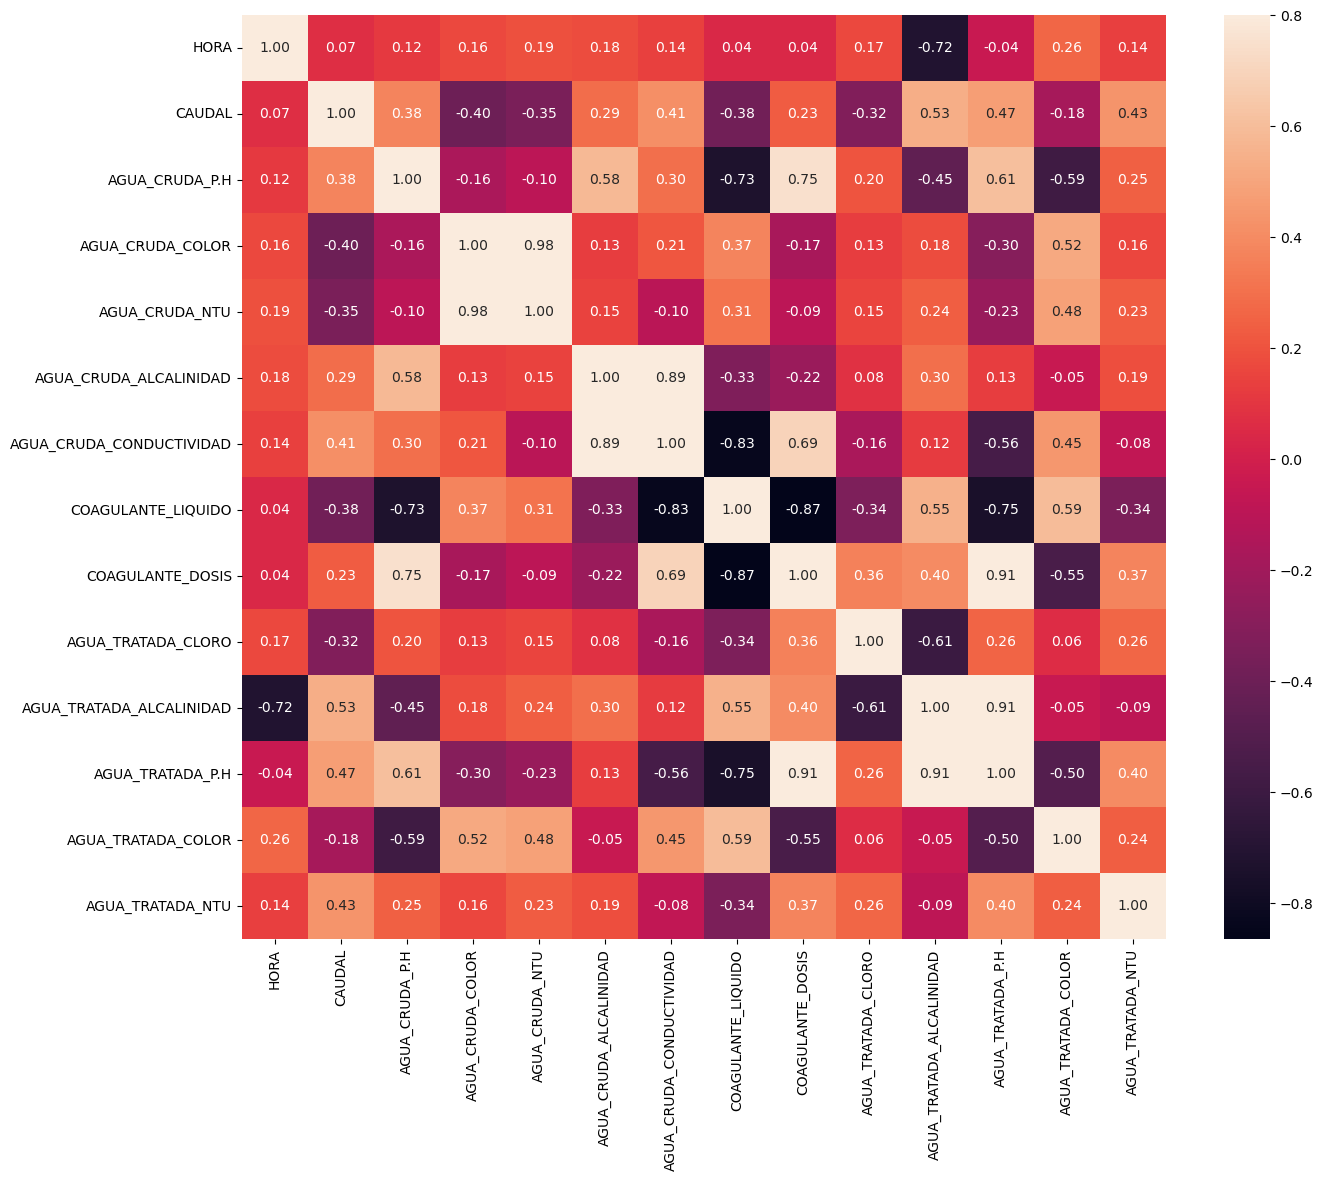

In [60]:
# Matriz de correlación:
corrmat = df_liquido.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corrmat, vmax=.8, annot = True, fmt = '.2f', annot_kws = {'size': 10}, square=True);

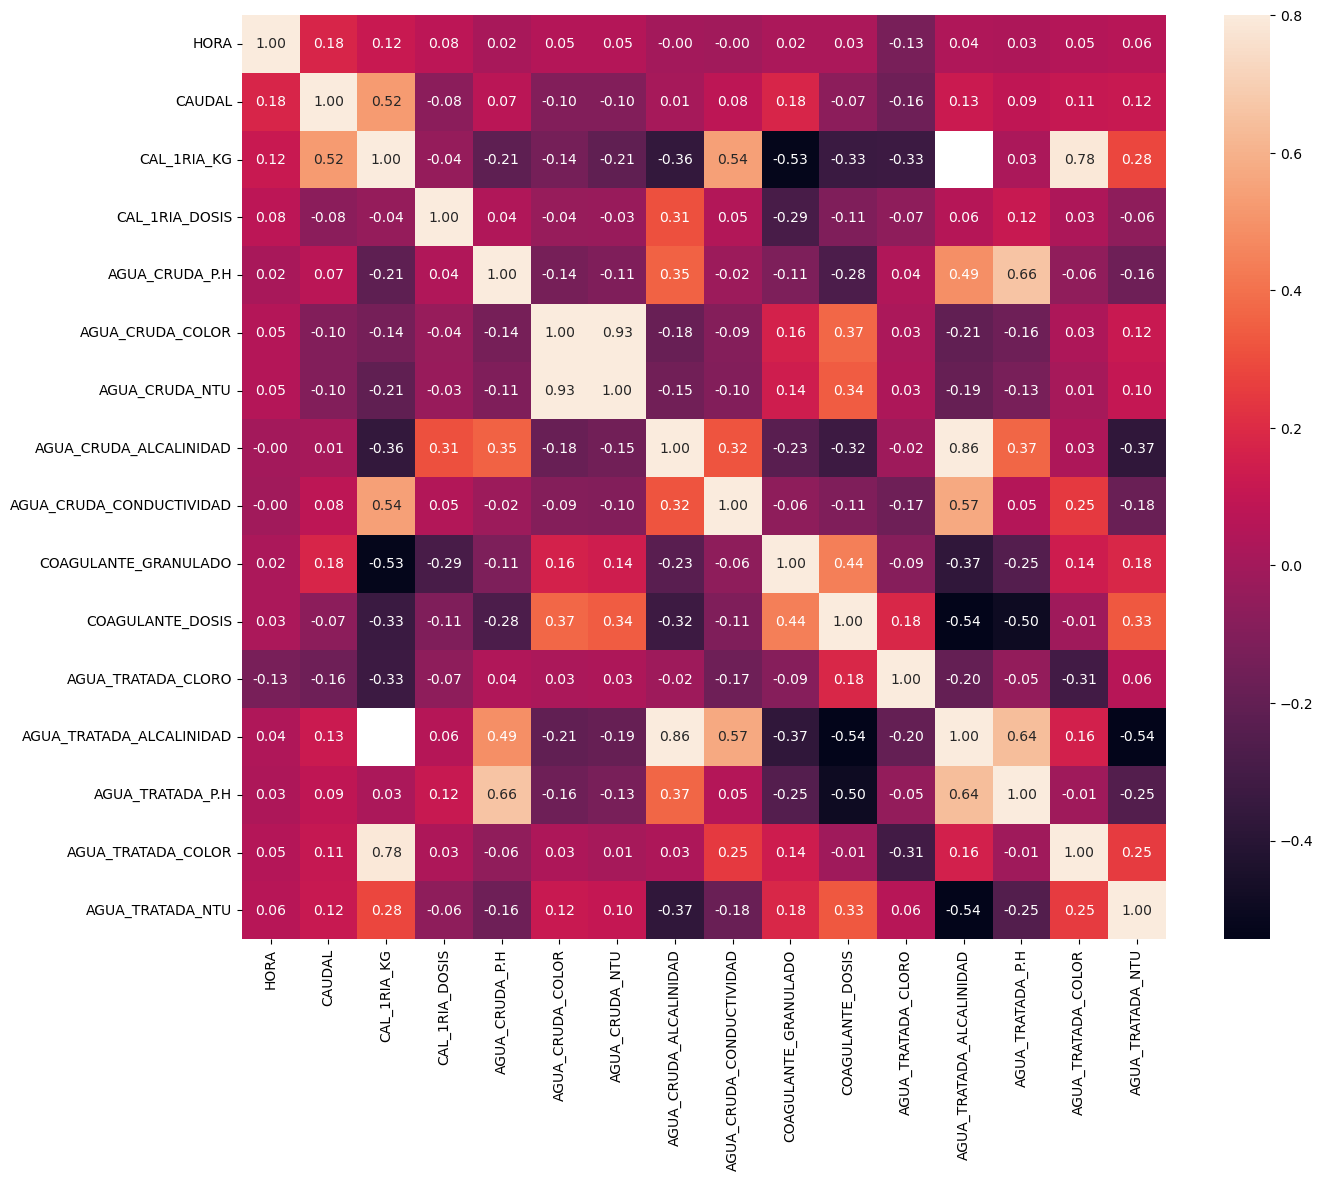

In [61]:
# Matriz de correlación:
corrmat = df_granulado.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corrmat, vmax=.8, annot = True, fmt = '.2f', annot_kws = {'size': 10}, square=True);